In [7]:
import pandas as pd
import numpy as np

In [8]:
dataset = pd.read_csv('salary.csv')

In [9]:
print(dataset.shape)
print(dataset.head(6))
missing_value = dataset['income'].isnull().sum()
print(f"Number of missing values in 'income' column: {missing_value}")

(32561, 5)
   age  education.num  capital.gain  hours.per.week income
0   90              9             0              40  <=50K
1   82              9             0              18  <=50K
2   66             10             0              40  <=50K
3   54              4             0              40  <=50K
4   41             10             0              40  <=50K
5   34              9             0              45  <=50K
Number of missing values in 'income' column: 0


In [10]:
income_set = set(dataset['income'])
dataset['income'] = dataset['income'].map({'<=50K':0,'>50K':1})
# Fill NaN values with 0
dataset['income'].fillna(0, inplace=True)
# Convert to integers
dataset['income'] = dataset['income'].astype(int)
# Print the updated dataset
print(dataset.head(5))

   age  education.num  capital.gain  hours.per.week  income
0   90              9             0              40       0
1   82              9             0              18       0
2   66             10             0              40       0
3   54              4             0              40       0
4   41             10             0              40       0


In [11]:
x = dataset.iloc[:,:-1].values
x

array([[90,  9,  0, 40],
       [82,  9,  0, 18],
       [66, 10,  0, 40],
       ...,
       [40,  9,  0, 40],
       [58,  9,  0, 40],
       [22,  9,  0, 20]], dtype=int64)

In [12]:
y = dataset.iloc[:,-1].values
print(y[:300])

[0 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 1 0 1 1 0
 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]


In [13]:
#split data to train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state = 0)

In [15]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Text(0, 0.5, 'Mean error')

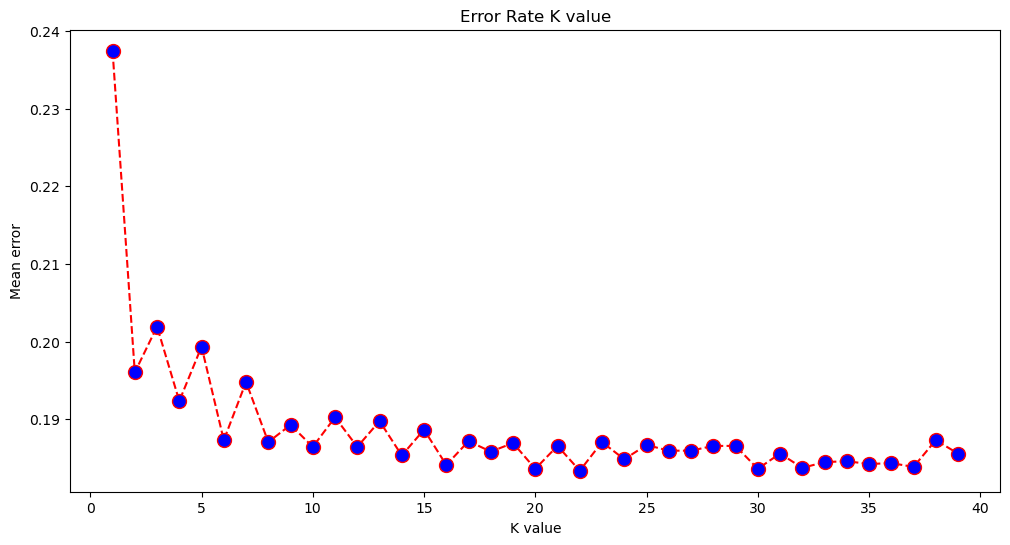

In [18]:
#finding the best k value
error = []
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

#calculating error ok k value between 1 to 40
for i in range(1,40):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(x_train,y_train)
    pred_i = model.predict(x_test)
    error.append(np.mean(pred_i != y_test))
plt.figure(figsize=(12,6))
plt.plot(range(1,40),error,color= 'red',linestyle = 'dashed',marker = 'o',markerfacecolor='blue',markersize=10)
plt.title('Error Rate K value')
plt.xlabel('K value')
plt.ylabel('Mean error')

In [20]:
# Training
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2, metric='minkowski', p=2)
model.fit(x_train, y_train)


KNeighborsClassifier(n_neighbors=2)

In [21]:
#predicting new customer will buy or not
age = int(input("enter the age : "))
edu = int(input("enter the education : "))
cg = int(input("enter the capital gain: "))
wh = int(input("enter the week per hour: "))
newEmp = [[age,edu,cg,wh]]
result = model.predict(sc.transform(newEmp))
print(result)
if result ==1:
    print("employees salary is above 50k")
else:
    print("salary less than 50k")

enter the age : 55
enter the education : 7
enter the capital gain: 450
enter the week per hour: 5
[0]
salary less than 50k


In [24]:
#Prediction of all dataset
y_pred = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [27]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model: {:.2f}%".format(accuracy * 100))

Confusion matrix:
[[5916  277]
 [1319  629]]
Accuracy of the model: 80.40%
